In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-01 12:38:17.011593: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


# Split df into endurance and the rest

In [7]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"
with open(data_dir + 'in_situ_obs_with_ascat_params_9000_images.pickle', 'rb') as handle:
    ascat_dict = pickle.load(handle)

In [8]:
lat_endurance = ascat_dict['SouthernOcean2']['lat'][0]
lat_endurance

-54.4041

In [9]:
lon_endurance = ascat_dict['SouthernOcean2']['lon'][0]
lon_endurance

-89.2069

In [10]:
df['lat']

0        44.6393
1        44.6393
2        44.6393
3        44.6393
4        44.6393
          ...   
10195    59.9337
10196    59.9337
10197    59.9337
10198    59.9337
10199    59.9337
Name: lat, Length: 10200, dtype: float64

In [11]:
endurance_df = df.loc[((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
4294,-0.226153,0.409800,314.852379,2485.977417,1001.502346,1002.730472,4.152822,4.207456,76.923246,76.306303,...,125.909996,79.989998,34.180000,49.680000,38.610001,49.739998,20151215T024500Z,20151215T042658.125000Z,2.180130,6.842782
4295,-0.128161,0.452313,293.776188,2486.052288,1001.724077,1002.952393,3.546917,3.626933,65.810629,64.671611,...,125.909996,79.989998,34.180000,49.680000,38.610001,49.739998,20151215T024500Z,20151215T042658.125000Z,2.872581,6.752807
4296,-0.298654,0.162721,253.780000,2486.204273,1007.051633,1008.287506,3.712804,3.775893,70.103904,69.273868,...,-32.980000,-78.699997,-124.369995,43.639999,33.130001,43.489998,20151215T143300Z,20151215T161458.125000Z,-1.722971,7.596694
4297,-0.199402,0.028419,268.114998,2486.106948,1007.671776,1008.908002,3.815438,3.878025,71.666022,70.860699,...,-32.980000,-78.699997,-124.369995,43.639999,33.130001,43.489998,20151215T143300Z,20151215T161458.125000Z,-2.125543,6.866002
4298,-0.150056,0.466602,251.800000,2485.460755,1012.784492,1014.023321,4.118902,4.148665,72.988445,72.679849,...,130.429993,83.849998,37.410000,63.820000,52.329998,63.939999,20151216T022400Z,20151216T040558.125000Z,0.248778,0.043073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,-0.052666,0.027217,328.239999,2484.521852,1007.084114,1008.320505,3.823384,3.902708,73.109400,72.170190,...,-34.969997,-80.989998,-127.019997,54.449997,42.959999,54.279999,20161211T144500Z,20161211T162358.125000Z,2.409765,9.504328
5582,0.008974,0.035900,315.589998,2484.524905,1014.660793,1015.902994,4.052213,4.110832,73.646211,72.963392,...,127.989998,81.790001,35.689999,57.270000,45.799999,57.360001,20161212T023600Z,20161212T041758.125000Z,2.092953,6.273903
5583,-0.020666,0.076594,328.199997,2484.533849,1015.260039,1016.505511,4.093316,4.134957,77.126514,76.746730,...,127.989998,81.790001,35.689999,57.270000,45.799999,57.360001,20161212T023600Z,20161212T041758.125000Z,2.352356,5.172424
5584,-0.024752,0.051784,316.505006,2484.547622,1015.412606,1016.655502,4.248352,4.292475,76.843252,76.398578,...,-162.569992,-118.000000,-73.430000,59.459999,48.450001,59.579998,20161212T041800Z,20161212T055958.125000Z,2.696101,4.017975


In [12]:
not_endurance_df = df.loc[~((df['lat'] == lat_endurance) & (df['lon'] == lon_endurance))]
not_endurance_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [13]:
endurance_df = endurance_df.sample(frac = 1, random_state=77)
not_endurance_df = not_endurance_df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,1.125562,-5.806792
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,0.063789,-5.914661
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,-0.424115,1.525726
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.056819,2.623381
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,-0.504271,6.171964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,1.487218,11.194811
10196,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,4.111861,8.730479
10197,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,5.372468,8.590097
10198,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,8.845551,7.408846


In [14]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

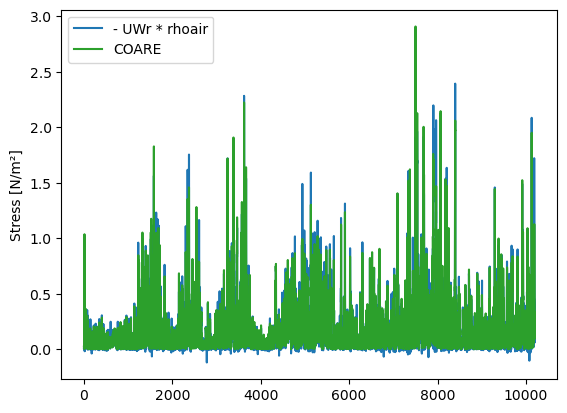

In [15]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

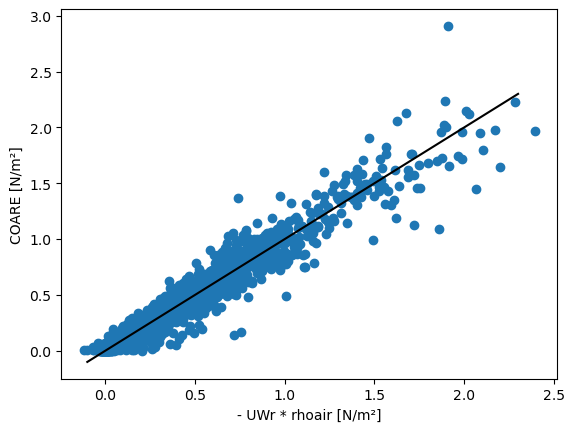

In [16]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

# Remove some extreme values

In [17]:
endurance_df = endurance_df[( (endurance_df['UWr'] >= -2) & (endurance_df['UWr'] <= 2) )]   
not_endurance_df = not_endurance_df[( (not_endurance_df['UWr'] >= -2) & (not_endurance_df['UWr'] <= 2) )]   

# Prepare features and labels

In [18]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'lat', 'lon'
]

In [19]:
x_train = not_endurance_df[predictor_variables]
x_train

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
7653,-14.206356,-11.949713,-18.941879,-18.490000,-63.180000,-108.180000,43.799999,33.639999,44.070000,3.816346,-9.417418,59.933700,-39.473780
7815,-18.165287,-15.543256,-15.407959,-17.570000,-62.230000,-107.059998,47.779999,37.160000,47.869999,6.045154,7.037160,59.933700,-39.473780
7729,-23.985594,-18.784288,-17.515404,-141.860001,-95.479996,-49.039997,63.869999,52.369999,63.770000,-5.650256,7.495404,59.933700,-39.473780
1913,-15.643591,-14.756548,-17.875481,-144.729996,-98.779999,-52.829998,57.230000,45.759998,57.110001,-0.964876,-9.998016,44.639300,-124.304000
4176,-21.313244,-16.495247,-22.367971,56.570000,101.930000,147.119995,48.610001,37.759998,48.520000,-8.517357,1.462537,10.050802,-125.032317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-21.837875,-19.320875,-20.299641,114.019997,69.209999,24.529999,52.689999,41.649998,52.549999,2.790827,2.521395,44.639300,-124.304000
6124,-25.963768,-22.076572,-21.348816,-24.959999,-69.729996,-114.570000,59.020000,47.930000,59.090000,5.567814,5.508388,40.133400,-70.778500
9124,-24.470440,-23.885769,-28.561481,-22.109999,-66.839996,-111.639999,63.369999,52.379997,63.459999,3.252593,-6.708321,44.639300,-124.304000
2283,-22.848459,-16.476969,-19.476072,-24.299999,-69.070000,-113.919998,61.529999,50.469997,61.609997,9.488249,-0.378240,40.133400,-70.778500


In [20]:
x_test = endurance_df[predictor_variables]
x_test

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,lat,lon
4840,-20.434162,-20.196560,-20.421364,-34.549999,-80.509995,-126.639999,52.539997,41.139999,52.439999,0.114824,-8.206409,-54.4041,-89.2069
4472,-18.348684,-11.855766,-20.154863,123.309998,77.680000,32.189999,37.309998,27.820000,37.309998,4.820233,-0.345129,-54.4041,-89.2069
4976,-16.528656,-10.607053,-15.702346,126.790001,80.750000,34.649998,53.070000,41.759998,53.239998,13.303293,3.531815,-54.4041,-89.2069
4558,-22.877472,-16.654091,-19.091637,-161.830002,-117.360001,-72.839996,57.849998,46.889999,57.980000,9.396648,-2.699740,-54.4041,-89.2069
4512,-15.690912,-7.901289,-10.548729,123.209999,77.599998,31.820000,37.369999,27.859999,37.469997,5.253990,12.187641,-54.4041,-89.2069
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,-13.635017,-8.084811,-14.680878,123.680000,78.000000,32.450001,40.110001,30.179998,40.139999,9.648255,0.921063,-54.4041,-89.2069
5221,-14.006800,-7.161175,-10.990517,68.820000,113.479996,158.029999,42.509998,32.410000,42.340000,12.301117,-9.521944,-54.4041,-89.2069
4529,-16.570658,-18.687529,-21.676390,129.860001,83.369995,37.020000,62.439999,50.919998,62.559998,6.937986,-8.736106,-54.4041,-89.2069
4901,-23.972216,-17.114084,-21.137520,-33.969997,-79.839996,-125.689995,49.779999,38.599998,49.619999,4.708959,1.365864,-54.4041,-89.2069


In [21]:
y_train = - not_endurance_df['UWr'] * not_endurance_df['rhoair']
y_train

7653     0.192551
7815     0.299385
7729     0.179516
1913     0.330500
4176     0.131350
           ...   
167      0.009779
6124     0.123391
9124     0.015914
2283     0.157549
10091    0.028873
Length: 8908, dtype: float64

In [22]:
y_test = - endurance_df['UWr'] * endurance_df['rhoair']
y_test

4840    0.135674
4472    0.015682
4976    0.342713
4558    0.080331
4512    0.383854
          ...   
5030    0.221873
5221    0.491988
4529    0.211726
4901    0.019524
5021    0.292965
Length: 1292, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [23]:
c_train = not_endurance_df['stress']
c_test = endurance_df['stress']

In [24]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [25]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [26]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [27]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-01 12:38:45.654295: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-01 12:38:45.654803: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-01 12:38:45.654813: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-01 12:38:45.654832: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-1l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-01 12:38:45.655044: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
195/195 [==============================] - 1s 2ms/step - loss: 2.2742 - mean_absolute_error: 1.1193 - val_loss: 1.4149 - val_mean_absolute_error: 0.8409
Epoch 2/500
195/195 [==============================] - 0s 633us/step - loss: 1.3935 - mean_absolute_error: 0.7875 - val_loss: 0.9710 - val_mean_absolute_error: 0.6507
Epoch 3/500
195/195 [==============================] - 0s 584us/step - loss: 0.9430 - mean_absolute_error: 0.6212 - val_loss: 0.7958 - val_mean_absolute_error: 0.5716
Epoch 4/500
195/195 [==============================] - 0s 605us/step - loss: 0.8283 - mean_absolute_error: 0.5637 - val_loss: 0.7182 - val_mean_absolute_error: 0.5367
Epoch 5/500
195/195 [==============================] - 0s 591us/step - loss: 0.7101 - mean_absolute_error: 0.5271 - val_loss: 0.6790 - val_mean_absolute_error: 0.5206
Epoch 6/500
195/195 [==============================] - 0s 587us/step - loss: 0.6539 - mean_absolute_error: 0.5111 - val_loss: 0.6578 - val_mean_absolute_error: 0.5157


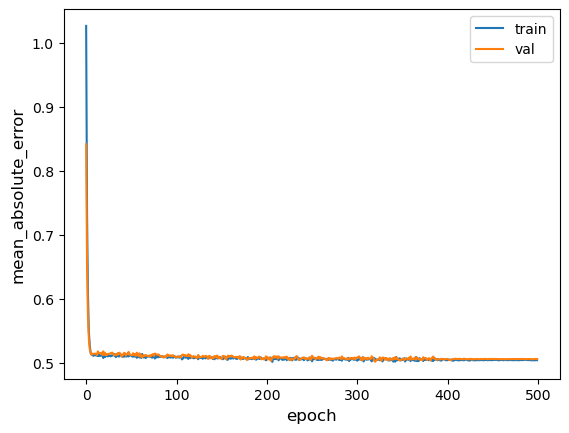

41/41 [==============================] - 0s 372us/step - loss: 0.6308 - mean_absolute_error: 0.6531
Test accuracy 0.6530569791793823
Test loss 0.6308305263519287


In [28]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [29]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [30]:
np.mean(y_test)

0.2302927983015855

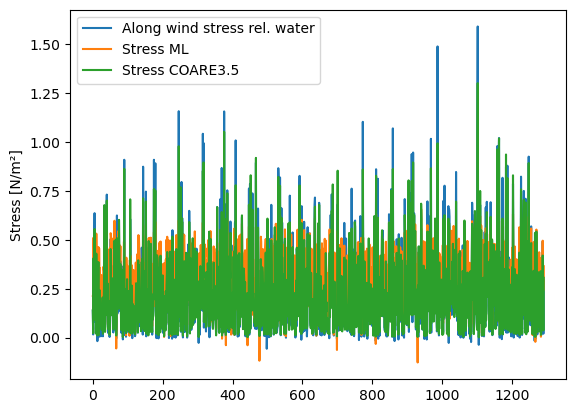

In [31]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

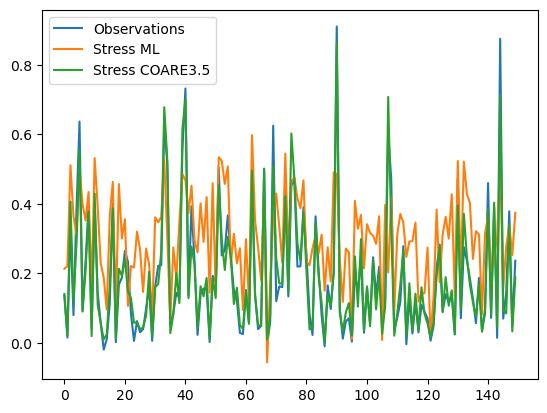

In [32]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

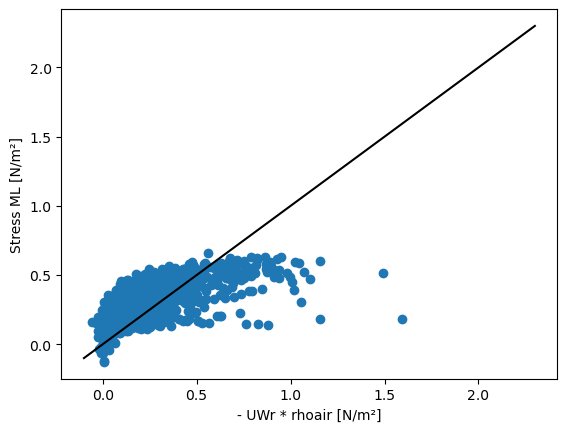

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

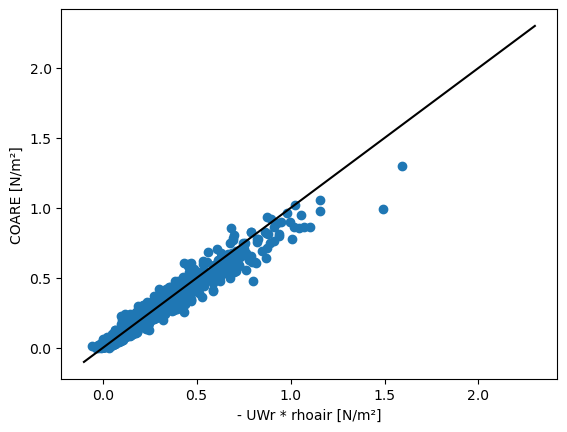

In [34]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.27262762593887147

In [36]:
rmse(y_test.values, c_test)

0.05038344526930403

## Correlation

In [37]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.63570811],
       [0.63570811, 1.        ]])

In [38]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

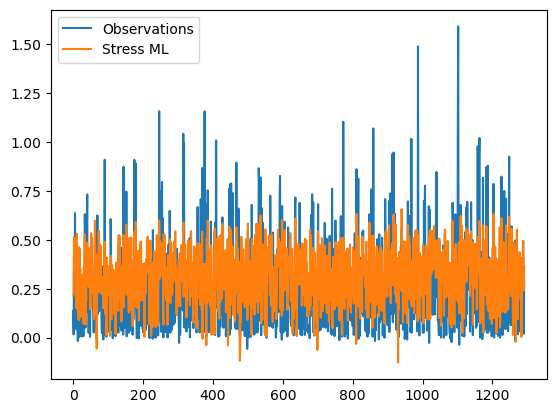

In [39]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.63570811],
       [0.63570811, 1.        ]])

In [41]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

In [42]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.27262762593887147

# Other experiments

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [45]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
183/183 [==============================] - 1s 1ms/step - loss: 1.7288 - mean_absolute_error: 0.9900 - val_loss: 1.0277 - val_mean_absolute_error: 0.7267
Epoch 2/500
183/183 [==============================] - 0s 702us/step - loss: 0.9259 - mean_absolute_error: 0.6897 - val_loss: 0.7913 - val_mean_absolute_error: 0.5985
Epoch 3/500
183/183 [==============================] - 0s 697us/step - loss: 0.6575 - mean_absolute_error: 0.5636 - val_loss: 0.6465 - val_mean_absolute_error: 0.5203
Epoch 4/500
183/183 [==============================] - 0s 711us/step - loss: 0.5660 - mean_absolute_error: 0.5094 - val_loss: 0.5640 - val_mean_absolute_error: 0.4791
Epoch 5/500
183/183 [==============================] - 0s 685us/step - loss: 0.5239 - mean_absolute_error: 0.4792 - val_loss: 0.5226 - val_mean_absolute_error: 0.4532
Epoch 6/500
183/183 [==============================] - 0s 724us/step - loss: 0.4897 - mean_absolute_error: 0.4426 - val_loss: 0.5015 - val_mean_absolute_error: 0.4427


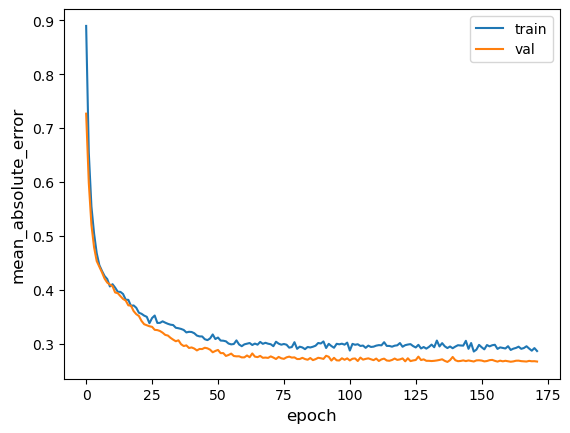

59/59 [==============================] - 0s 458us/step - loss: 8.4111 - mean_absolute_error: 1.8161
Test accuracy 1.8160842657089233
Test loss 8.411136627197266


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

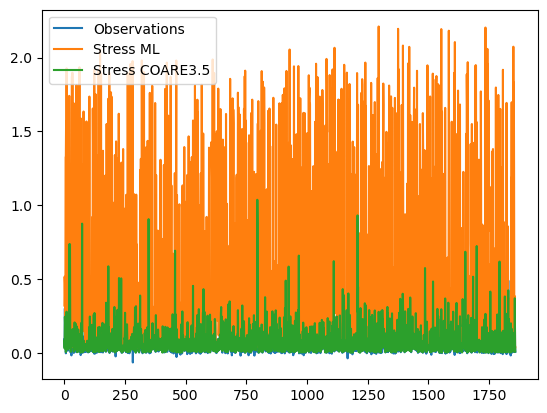

In [48]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

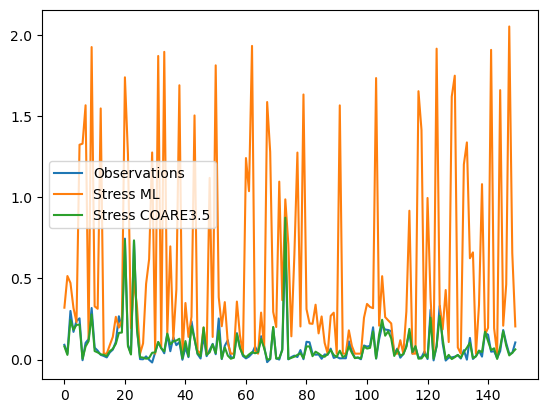

In [49]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [50]:
rmse(y_test.values, y_test_pred)

0.7414025701317624

## Correlation

In [51]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.11915318],
       [0.11915318, 1.        ]])

In [52]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [53]:
y_test.values.shape

(1859,)

In [54]:
y_test_pred[:, 0].shape

(1859,)

In [55]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [56]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09077617, 0.03689986, 0.29968651, ..., 0.32256432, 0.0562417 ,
       0.00505536])

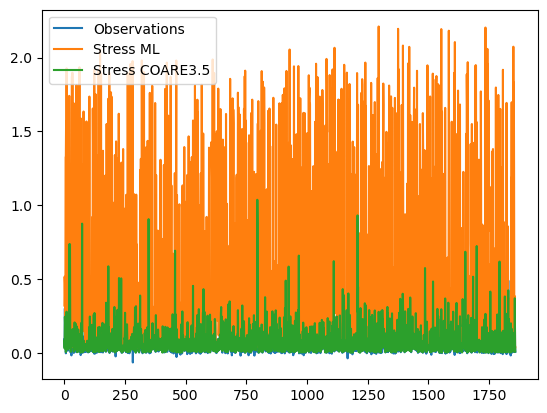

In [57]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

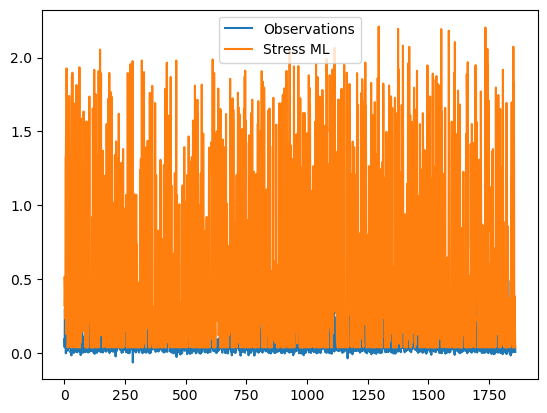

In [58]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [59]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [60]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.7414025701317624

Text(0, 0.5, 'Stress ML [N/m²]')

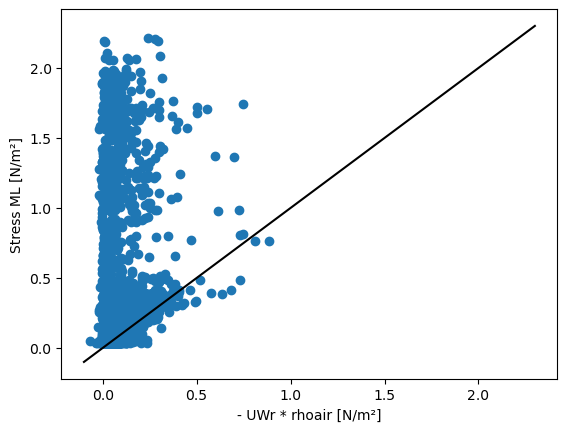

In [61]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [62]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [63]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [64]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
92/92 [==============================] - 0s 2ms/step - loss: 3.8618 - mean_absolute_error: 1.4084 - val_loss: 1.5284 - val_mean_absolute_error: 0.8062
Epoch 2/500
92/92 [==============================] - 0s 894us/step - loss: 2.3526 - mean_absolute_error: 1.1333 - val_loss: 1.2327 - val_mean_absolute_error: 0.7379
Epoch 3/500
92/92 [==============================] - 0s 905us/step - loss: 1.7265 - mean_absolute_error: 0.9559 - val_loss: 1.0517 - val_mean_absolute_error: 0.6808
Epoch 4/500
92/92 [==============================] - 0s 907us/step - loss: 1.3890 - mean_absolute_error: 0.8403 - val_loss: 0.9656 - val_mean_absolute_error: 0.6496
Epoch 5/500
92/92 [==============================] - 0s 890us/step - loss: 1.1881 - mean_absolute_error: 0.7762 - val_loss: 0.8938 - val_mean_absolute_error: 0.6162
Epoch 6/500
92/92 [==============================] - 0s 889us/step - loss: 1.1096 - mean_absolute_error: 0.7335 - val_loss: 0.8402 - val_mean_absolute_error: 0.5913
Epoch 7/500


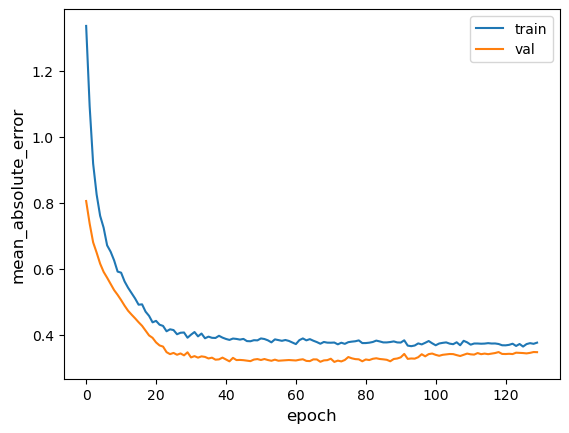

59/59 [==============================] - 0s 381us/step - loss: 3.7144 - mean_absolute_error: 1.3571
Test accuracy 1.357134222984314
Test loss 3.714445114135742


In [65]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [66]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [67]:
rmse(y_test.values, y_test_pred)

0.49874629632853235

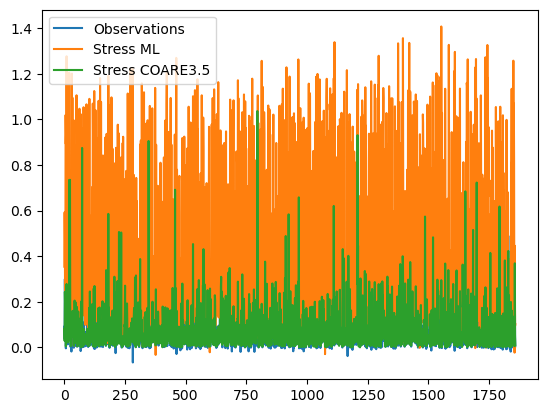

In [68]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

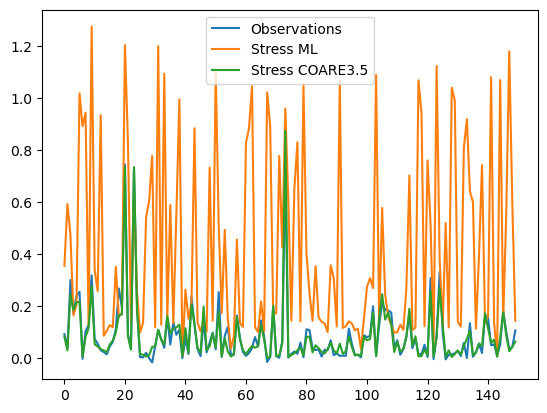

In [69]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

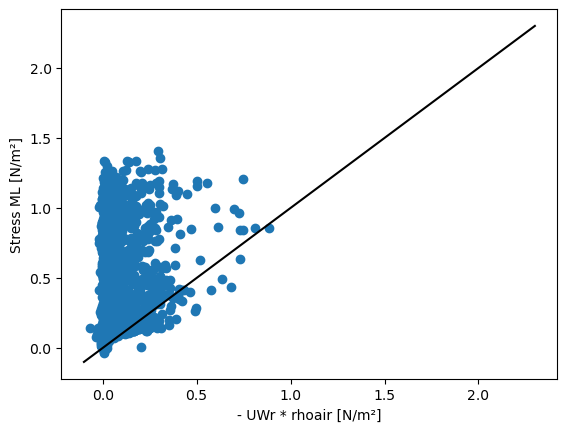

In [70]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [71]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.16938155],
       [0.16938155, 1.        ]])

In [72]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

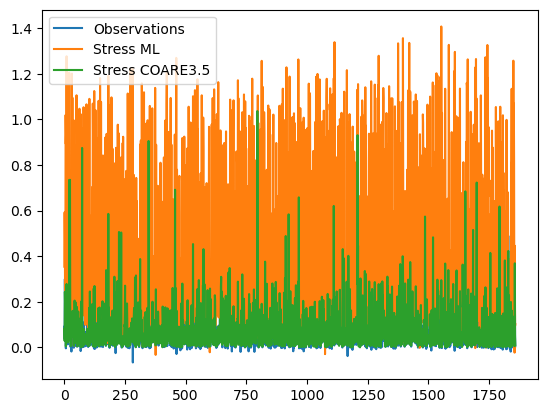

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

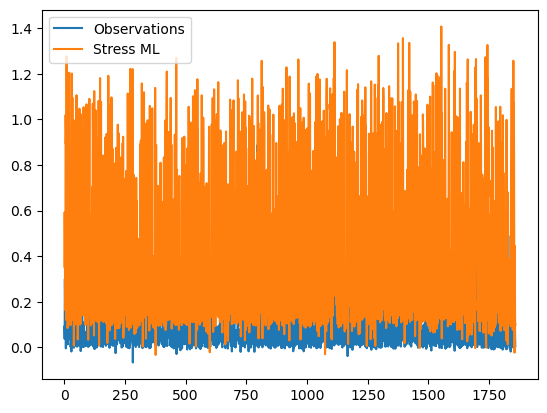

In [74]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [75]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [76]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.49874629632853235

Text(0, 0.5, 'Stress ML [N/m²]')

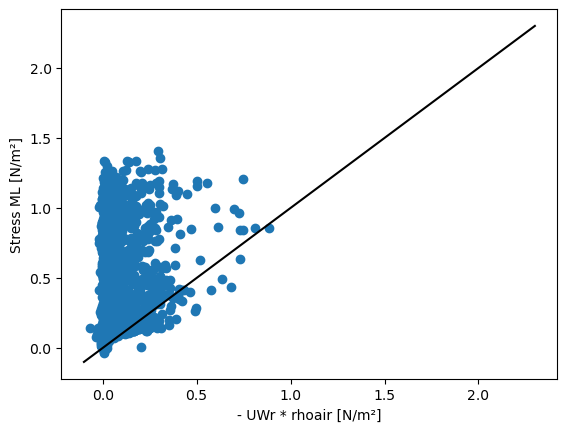

In [77]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# Best model

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 43ms/step - loss: 10.2470 - mean_absolute_error: 2.1701 - val_loss: 1.0111 - val_mean_absolute_error: 0.6537
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 1.4797 - mean_absolute_error: 0.9168 - val_loss: 0.9434 - val_mean_absolute_error: 0.6877
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 1.3317 - mean_absolute_error: 0.7673 - val_loss: 0.9428 - val_mean_absolute_error: 0.6554
Epoch 4/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9204 - mean_absolute_error: 0.6621 - val_loss: 0.9717 - val_mean_absolute_error: 0.7189
Epoch 5/500
12/12 [==============================] - 0s 32ms/step - loss: 0.9824 - mean_absolute_error: 0.6682 - val_loss: 0.9373 - val_mean_absolute_error: 0.5806
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.8049 - mean_absolute_error: 0.6385 - val_loss: 0.9990 - val_mean_absolute_error: 0.7403
Epoch 7/500
12/

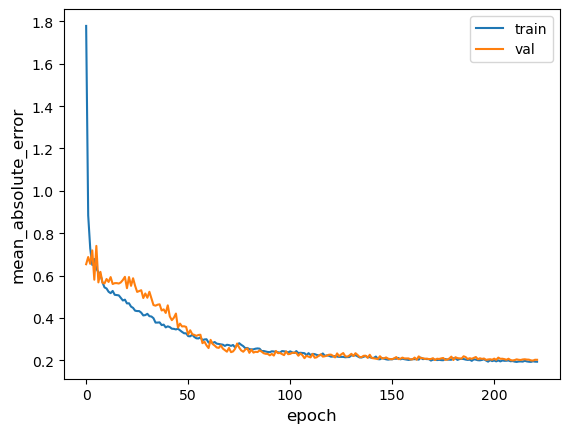

59/59 [==============================] - 0s 2ms/step - loss: 0.9096 - mean_absolute_error: 0.7119
Test accuracy 0.7118774056434631
Test loss 0.9095725417137146


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [83]:
rmse(y_test.values, y_test_pred)

0.2626092526529981

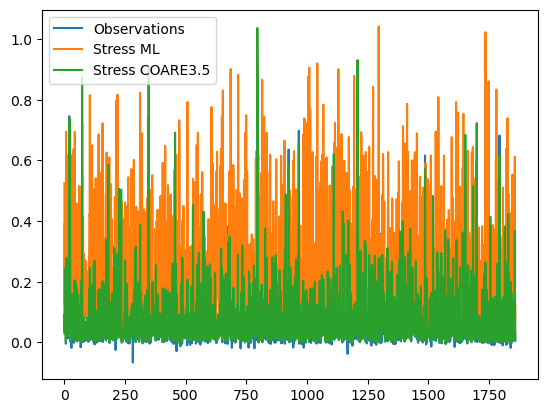

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

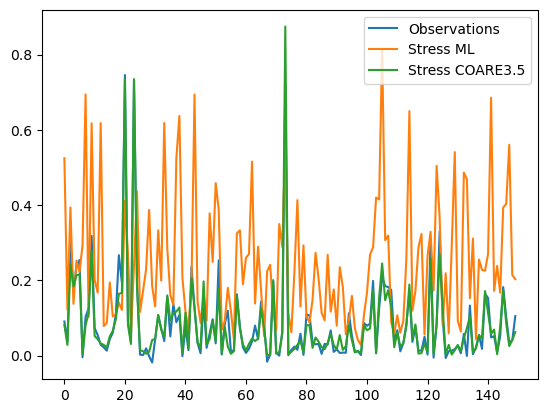

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [86]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.30252408],
       [0.30252408, 1.        ]])

In [87]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

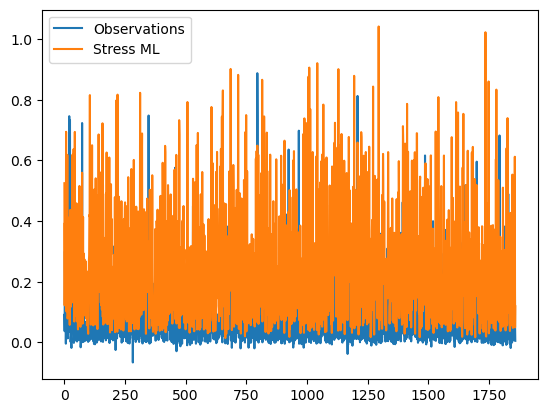

In [88]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [89]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [90]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2626092526529981

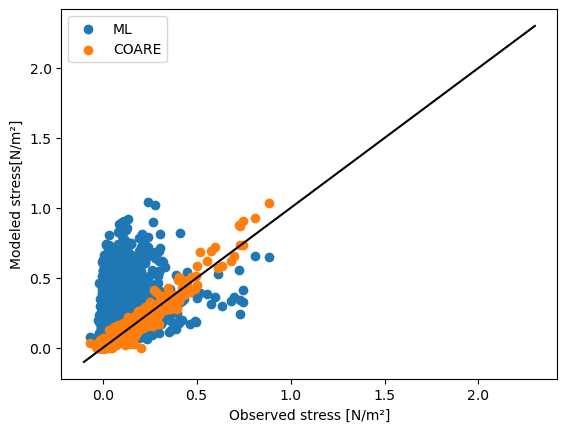

In [91]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

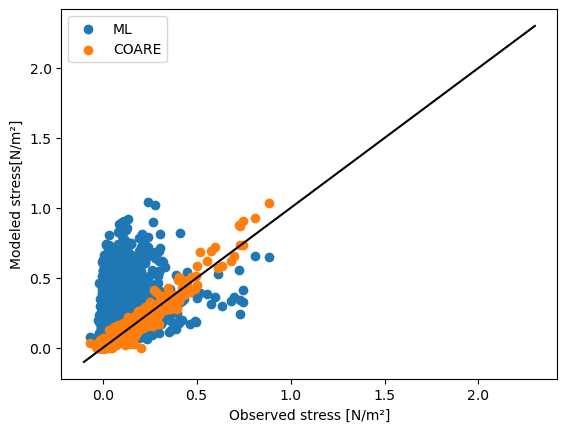

In [92]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [93]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [94]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [95]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 148ms/step - loss: 15.8870 - mean_absolute_error: 2.6035 - val_loss: 1.0324 - val_mean_absolute_error: 0.6501
Epoch 2/500
6/6 [==============================] - 1s 121ms/step - loss: 2.4081 - mean_absolute_error: 1.1531 - val_loss: 0.9348 - val_mean_absolute_error: 0.6849
Epoch 3/500
6/6 [==============================] - 1s 131ms/step - loss: 1.6157 - mean_absolute_error: 0.9259 - val_loss: 0.9230 - val_mean_absolute_error: 0.6669
Epoch 4/500
6/6 [==============================] - 1s 115ms/step - loss: 1.1405 - mean_absolute_error: 0.7794 - val_loss: 0.8322 - val_mean_absolute_error: 0.5859
Epoch 5/500
6/6 [==============================] - 1s 122ms/step - loss: 1.3405 - mean_absolute_error: 0.7968 - val_loss: 0.9537 - val_mean_absolute_error: 0.6390
Epoch 6/500
6/6 [==============================] - 1s 124ms/step - loss: 1.0055 - mean_absolute_error: 0.7303 - val_loss: 0.9231 - val_mean_absolute_error: 0.5817
Epoch 7/500
6/6 [====

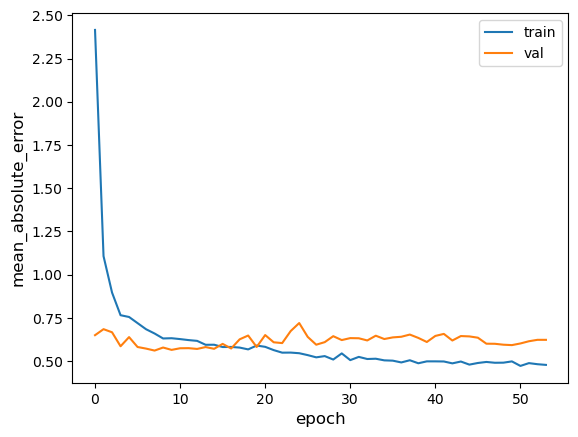

59/59 [==============================] - 0s 8ms/step - loss: 0.1745 - mean_absolute_error: 0.2607
Test accuracy 0.26066505908966064
Test loss 0.1745096743106842


In [96]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [97]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [98]:
rmse(y_test.values, y_test_pred)

0.1130186032097857

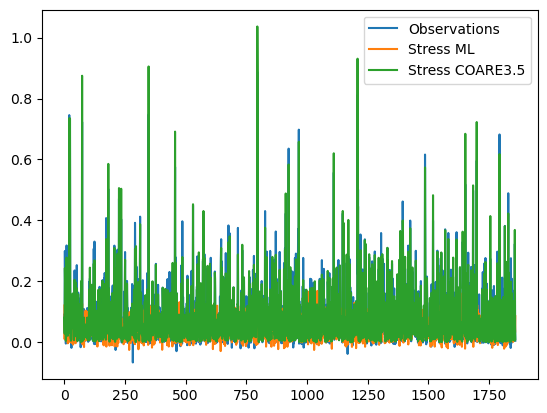

In [99]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

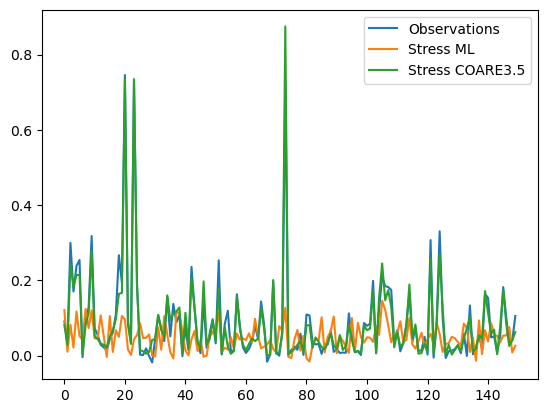

In [100]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [101]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.22904746],
       [0.22904746, 1.        ]])

In [102]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

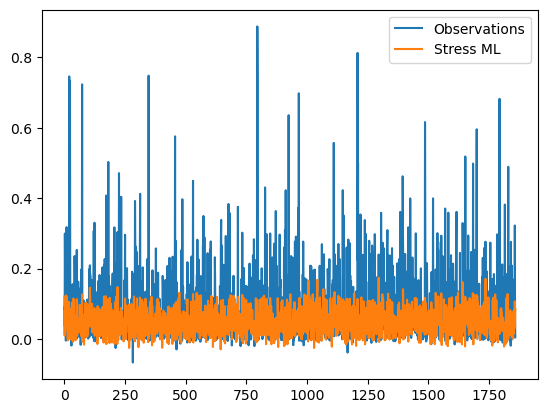

In [103]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [104]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [105]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.1130186032097857

Text(0, 0.5, 'Stress ML [N/m²]')

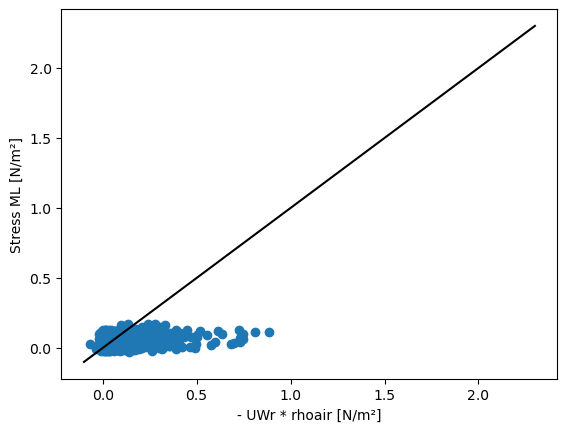

In [106]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [107]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [108]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [109]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 665ms/step - loss: 18.1975 - mean_absolute_error: 2.8702 - val_loss: 1.1602 - val_mean_absolute_error: 0.7179
Epoch 2/1000
3/3 [==============================] - 2s 596ms/step - loss: 2.5959 - mean_absolute_error: 1.2666 - val_loss: 1.1607 - val_mean_absolute_error: 0.6379
Epoch 3/1000
3/3 [==============================] - 2s 603ms/step - loss: 2.3318 - mean_absolute_error: 1.1468 - val_loss: 0.7916 - val_mean_absolute_error: 0.5686
Epoch 4/1000
3/3 [==============================] - 2s 603ms/step - loss: 1.7256 - mean_absolute_error: 0.9401 - val_loss: 0.7740 - val_mean_absolute_error: 0.5238
Epoch 5/1000
3/3 [==============================] - 2s 596ms/step - loss: 1.6053 - mean_absolute_error: 0.8371 - val_loss: 1.4584 - val_mean_absolute_error: 0.8413
Epoch 6/1000
3/3 [==============================] - 2s 591ms/step - loss: 1.3248 - mean_absolute_error: 0.8542 - val_loss: 2.0877 - val_mean_absolute_error: 1.1584
Epoch 7/1000
3/

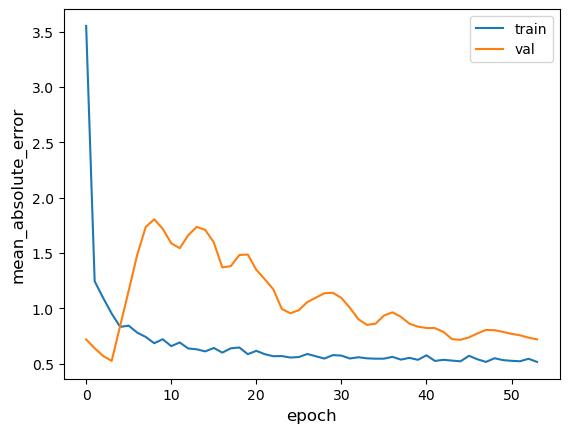

59/59 [==============================] - 2s 25ms/step - loss: 0.2047 - mean_absolute_error: 0.2791
Test accuracy 0.279089093208313
Test loss 0.2046852707862854


In [110]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [111]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [112]:
rmse(y_test.values, y_test_pred)

0.11781038657036025

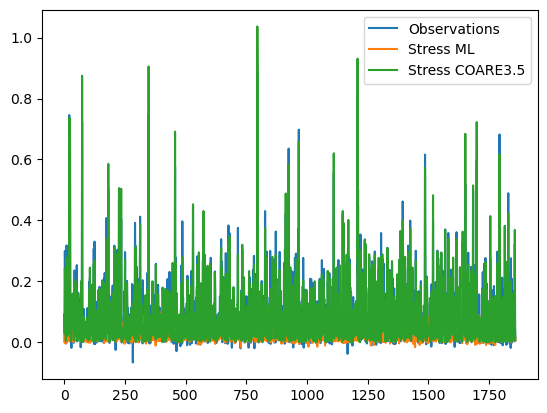

In [113]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

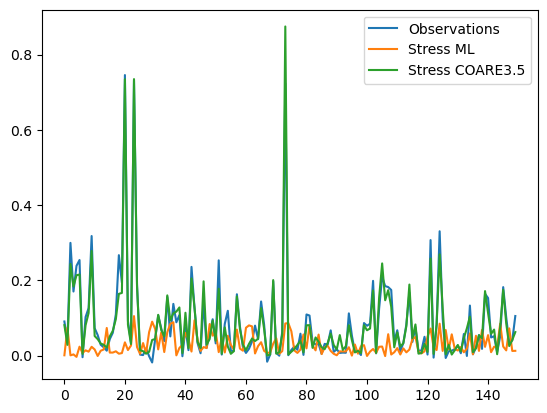

In [114]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [115]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15772837],
       [0.15772837, 1.        ]])

In [116]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

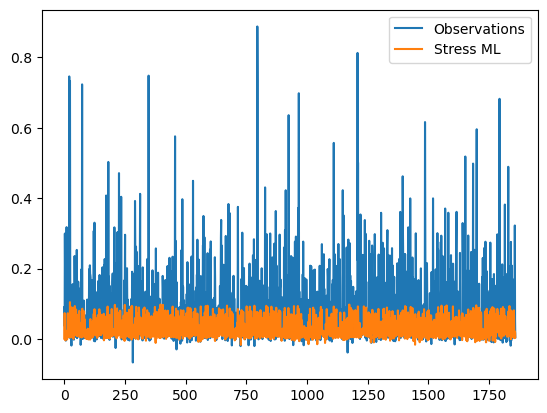

In [117]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [118]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.96796608],
       [0.96796608, 1.        ]])

In [119]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.11781038657036025

Text(0, 0.5, 'Stress ML [N/m²]')

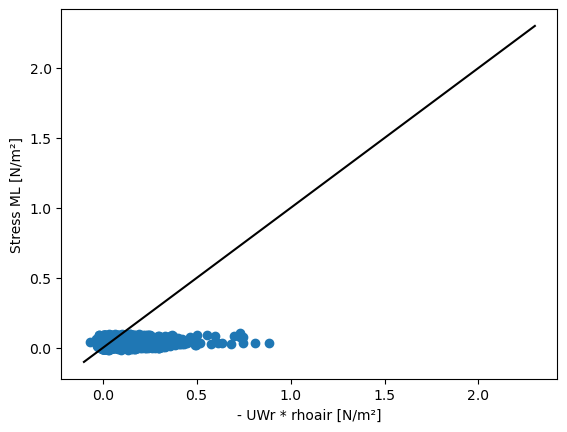

In [120]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [45]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
4/4 [==============================] - 3s 459ms/step - loss: 20.9089 - mean_absolute_error: 3.2004 - val_loss: 0.8438 - val_mean_absolute_error: 0.6018
Epoch 2/1000
4/4 [==============================] - 2s 428ms/step - loss: 3.5343 - mean_absolute_error: 1.4188 - val_loss: 2.7642 - val_mean_absolute_error: 0.7970
Epoch 3/1000
4/4 [==============================] - 2s 413ms/step - loss: 2.3028 - mean_absolute_error: 1.0722 - val_loss: 1.0591 - val_mean_absolute_error: 0.6085
Epoch 4/1000
4/4 [==============================] - 2s 426ms/step - loss: 1.7457 - mean_absolute_error: 0.9694 - val_loss: 2.1163 - val_mean_absolute_error: 0.7066
Epoch 5/1000
4/4 [==============================] - 2s 413ms/step - loss: 1.2968 - mean_absolute_error: 0.8458 - val_loss: 2.5473 - val_mean_absolute_error: 0.5835
Epoch 6/1000
4/4 [==============================] - 2s 410ms/step - loss: 1.4286 - mean_absolute_error: 0.8231 - val_loss: 1.1766 - val_mean_absolute_error: 0.7251
Epoch 7/1000
4/

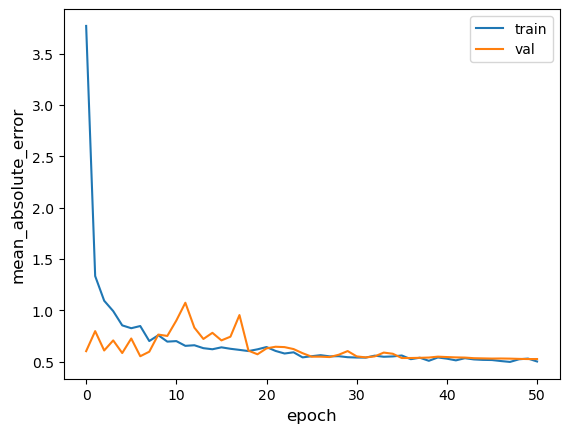

41/41 [==============================] - 1s 25ms/step - loss: 0.9746 - mean_absolute_error: 0.6530
Test accuracy 0.6530452966690063
Test loss 0.9746497869491577


In [46]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [47]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [48]:
rmse(y_test.values, y_test_pred)

0.24128868883692223

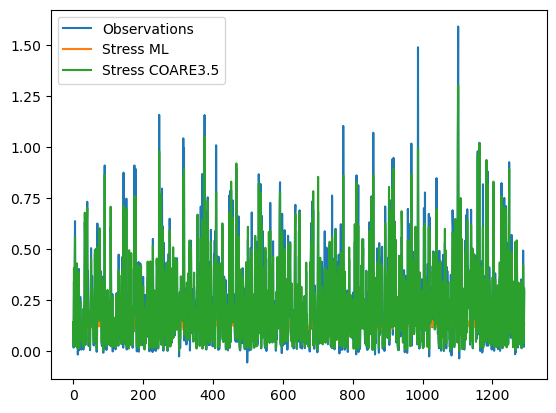

In [49]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

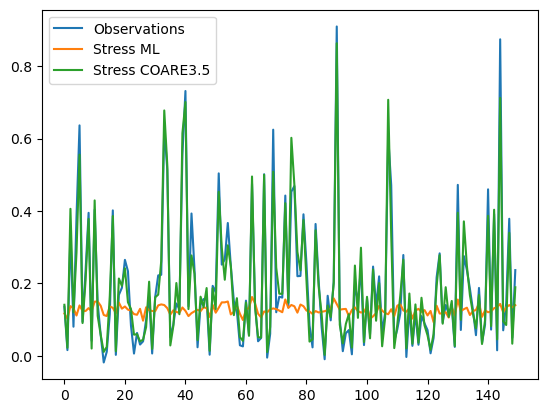

In [50]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [51]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.55471227],
       [0.55471227, 1.        ]])

In [52]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

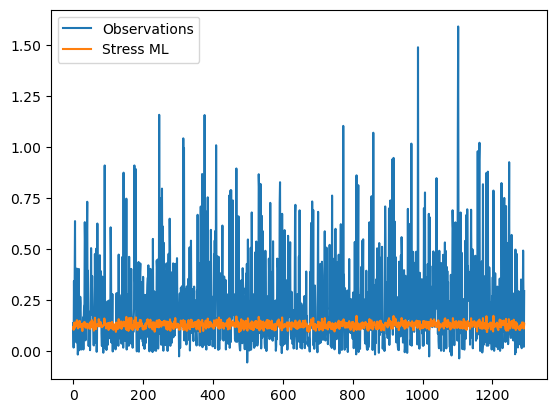

In [53]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [54]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

In [55]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.24128868883692223

Text(0, 0.5, 'Stress ML [N/m²]')

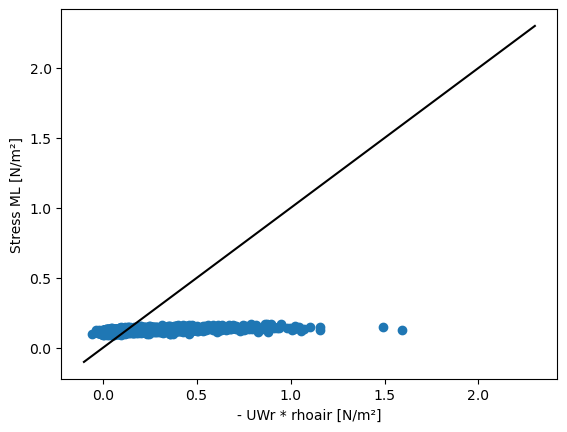

In [56]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [57]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [58]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [59]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
4/4 [==============================] - 3s 517ms/step - loss: 20.0212 - mean_absolute_error: 3.1063 - val_loss: 1.0858 - val_mean_absolute_error: 0.5374
Epoch 2/1000
4/4 [==============================] - 2s 448ms/step - loss: 3.3588 - mean_absolute_error: 1.3130 - val_loss: 0.6559 - val_mean_absolute_error: 0.5120
Epoch 3/1000
4/4 [==============================] - 2s 455ms/step - loss: 2.0907 - mean_absolute_error: 1.0445 - val_loss: 2.9515 - val_mean_absolute_error: 0.7395
Epoch 4/1000
4/4 [==============================] - 2s 449ms/step - loss: 1.9844 - mean_absolute_error: 0.9596 - val_loss: 1.0579 - val_mean_absolute_error: 0.6580
Epoch 5/1000
4/4 [==============================] - 2s 461ms/step - loss: 1.4819 - mean_absolute_error: 0.8451 - val_loss: 1.3704 - val_mean_absolute_error: 0.8604
Epoch 6/1000
4/4 [==============================] - 2s 461ms/step - loss: 1.3587 - mean_absolute_error: 0.8164 - val_loss: 2.0336 - val_mean_absolute_error: 0.8523
Epoch 7/1000
4/

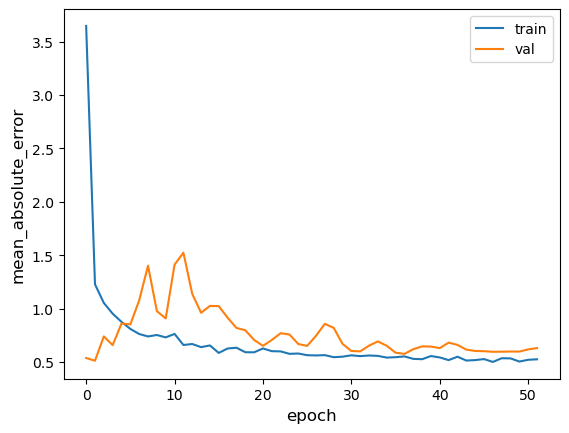

41/41 [==============================] - 1s 25ms/step - loss: 0.3649 - mean_absolute_error: 0.4680
Test accuracy 0.46797528862953186
Test loss 0.36492693424224854


In [60]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [61]:
y_test_pred = multi_dense_model.predict(x_test)

In [62]:
rmse(y_test.values, y_test_pred)

0.6815421268146015

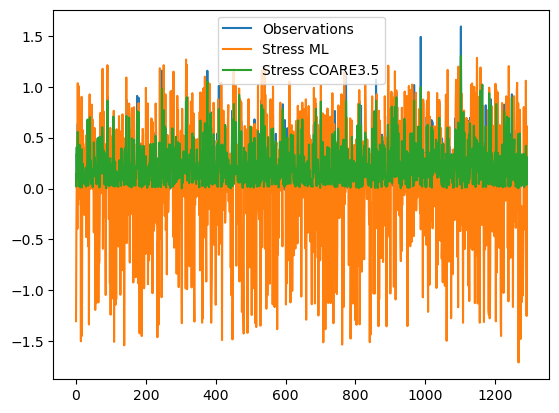

In [63]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

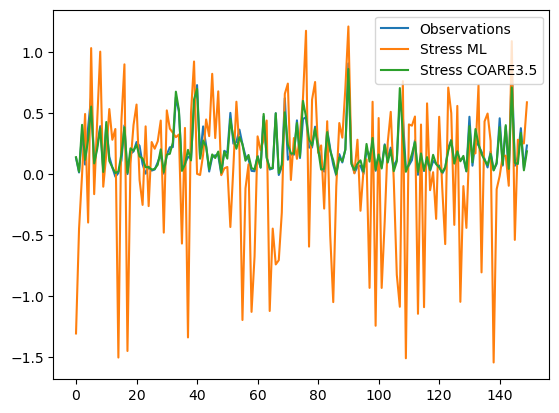

In [64]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [65]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.3716858],
       [0.3716858, 1.       ]])

In [66]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

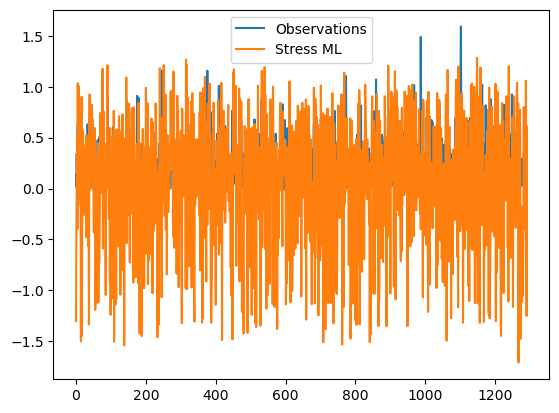

In [67]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [68]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97561633],
       [0.97561633, 1.        ]])

In [69]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.6815421268146015

Text(0, 0.5, 'Stress ML [N/m²]')

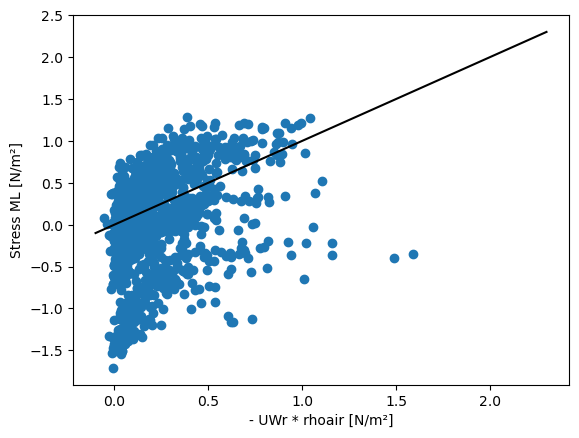

In [70]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 